In [1]:
# Imports
import os
from cloudpathlib import S3Client, AnyPath
import matplotlib.pyplot as plt

import rasterio

from eoreader.reader import Reader
from eoreader.bands import MNDWI, CLOUDS

# Other
AWS_S3_ENDPOINT = os.getenv("AWS_S3_ENDPOINT")

In [2]:
# Create your S3 compatible storage path with cloudpathlib
# See here for more insights about this awesome lib: https://cloudpathlib.drivendata.org/
client = S3Client(
    endpoint_url=f"https://{AWS_S3_ENDPOINT}",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
)
client.set_as_default_client()
path = AnyPath("s3://sertit-eoreader-ci").joinpath(
    "optical/S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749.SAFE/")

In [3]:
# Create an rasterio env to enable S3 compatible storage
with rasterio.Env(
        CPL_CURL_VERBOSE=False,
        AWS_VIRTUAL_HOSTING=False,
        AWS_S3_ENDPOINT=AWS_S3_ENDPOINT,
        GDAL_DISABLE_READDIR_ON_OPEN=False,
):
    # Create the reader
    reader = Reader()

    # Open your product
    prod = reader.open(path, remove_tmp=True)  # No need to unarchive here

    # Load this band
    band_dict = prod.load([MNDWI, CLOUDS])

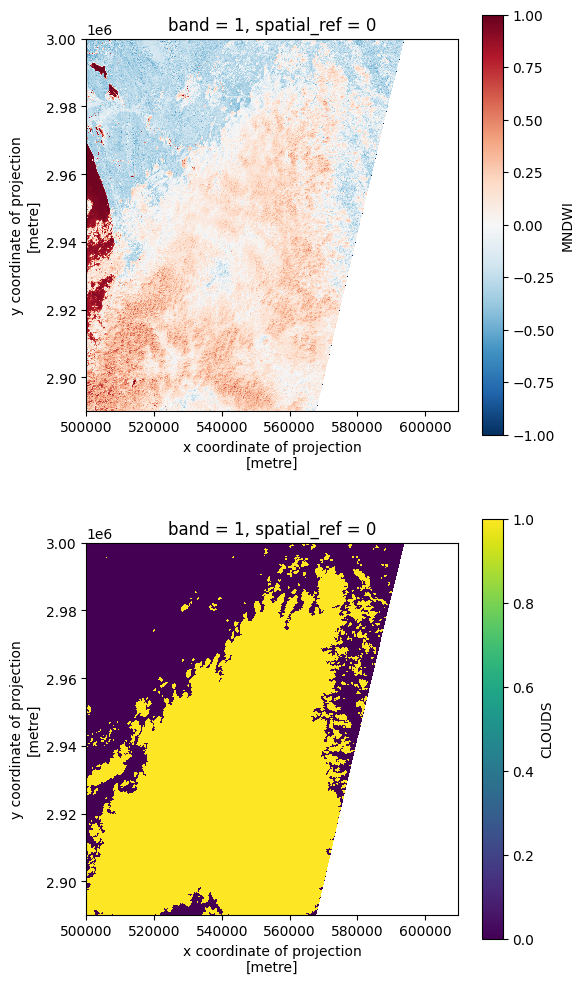

In [4]:
# Display
nrows = len(band_dict)
fig, axes = plt.subplots(nrows=nrows, figsize=(3 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})  # Square plots
for i, band in enumerate(band_dict.values()):
    band[::10, ::10].plot(x="x", y="y", ax=axes[i])